# SARIMA Model Parameters: $ (p, d, q) \times (P, D, Q, s) $

The **SARIMA** (Seasonal AutoRegressive Integrated Moving Average) model extends the **ARIMA** model by adding seasonal parameters. This model is widely used to handle time series with seasonality.

## Non-seasonal ARIMA Parameters: $ (p, d, q) $

1. **$ p $**: **Order of Autoregression (AR)**  
   - The number of lagged observations included in the model.
   - If $ p=1 $, the model considers the value from the previous time step to predict the current value.

2. **$ d $**: **Degree of Differencing (I)**  
   - Differencing is applied to make the series stationary by removing trends.
   - $ d=1 $ means the model subtracts each observation from the previous one.

3. **$ q $**: **Order of Moving Average (MA)**  
   - The number of lagged forecast errors in the model.
   - The moving average captures the relationship between an observation and residual errors from previous observations.


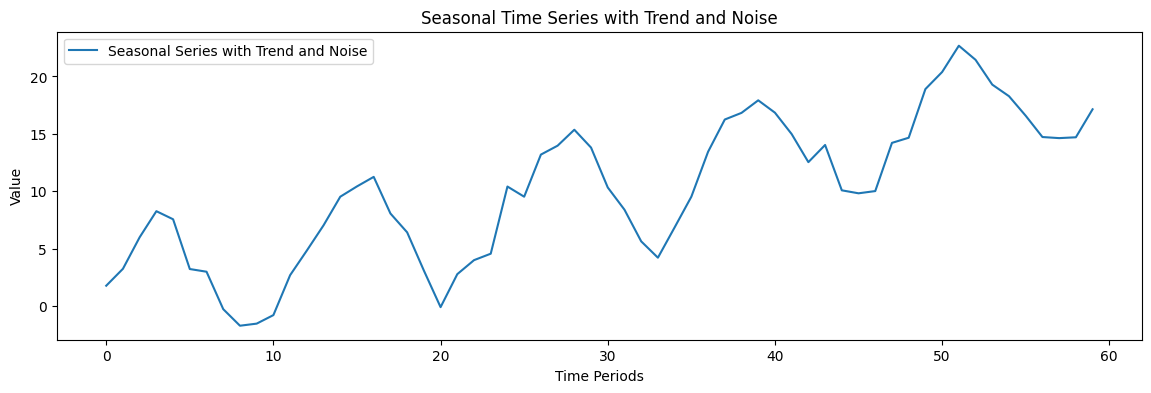

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generate a time series with both trend and seasonal components
np.random.seed(0)
n_periods = 60  # Total number of time periods
seasonal_period = 12  # Define the seasonal period, e.g., 12 for yearly seasonality in monthly data
noise = np.random.normal(0, 1, n_periods)

# Create a seasonal component with a sine wave
seasonal_pattern = 5 * np.sin(2 * np.pi * np.arange(n_periods) / seasonal_period)  # Smaller amplitude

# Create a linear trend (e.g., an upward trend)
trend = np.linspace(0, 20, n_periods)  # Larger trend to make it more noticeable

# Combine the seasonal pattern, trend, and noise to create the final time series
seasonal_series_with_trend = seasonal_pattern + trend + noise

# Convert the series to a pandas DataFrame
data = pd.Series(seasonal_series_with_trend)

# Plot the time series
plt.figure(figsize=(14, 4))
plt.plot(data, label="Seasonal Series with Trend and Noise")
plt.title("Seasonal Time Series with Trend and Noise")
plt.xlabel("Time Periods")
plt.ylabel("Value")
plt.legend()
plt.show()

## Seasonal Parameters: $ (P, D, Q, s) $

SARIMA adds these seasonal parameters, each operating on a seasonal period, $ s $.

1. **$ P $**: **Seasonal Order of Autoregression**  
   - The autoregressive order for the seasonal part.
   - Similar to $ p $, but considers seasonally lagged observations.
   - Example: With $ P=1 $ and $ s=12 $ (for monthly data with yearly seasonality), the model uses the observation from 12 steps back.

2. **$ D $**: **Seasonal Degree of Differencing**  
   - The number of seasonal differencing operations applied to remove seasonality.
   - Example: If $ D=1 $ and $ s=12 $, each value is subtracted from the value 12 steps back (one year before, in monthly data).

3. **$ Q $**: **Seasonal Order of Moving Average**  
   - The number of seasonal lagged forecast errors included in the model.
   - Similar to $ q $, but for seasonal lags.

4. **$ s $**: **Seasonal Period**  
   - Specifies the length of the seasonality cycle.
   - Example: $ s=12 $ for monthly data with yearly seasonality (12 months in a year), or $ s=4 $ for quarterly data with annual seasonality.


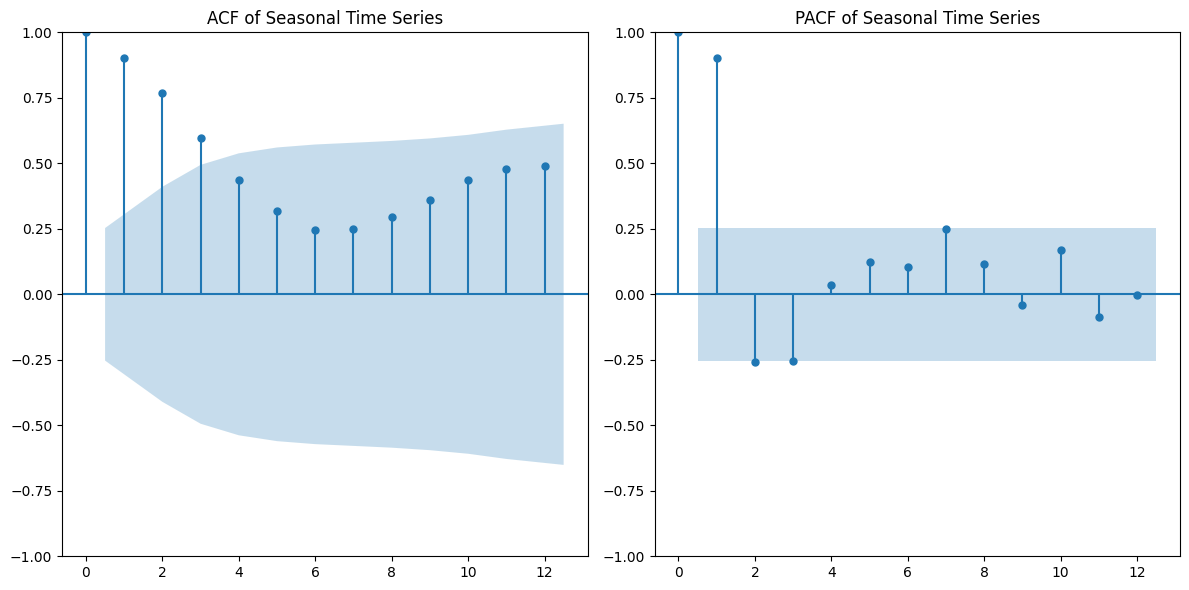

In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Step 2: Plot ACF and PACF for the time series
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(data, lags=seasonal_period, ax=plt.gca())
plt.title('ACF of Seasonal Time Series')

plt.subplot(1, 2, 2)
plot_pacf(data, lags=seasonal_period, ax=plt.gca())
plt.title('PACF of Seasonal Time Series')

plt.tight_layout()
plt.show()

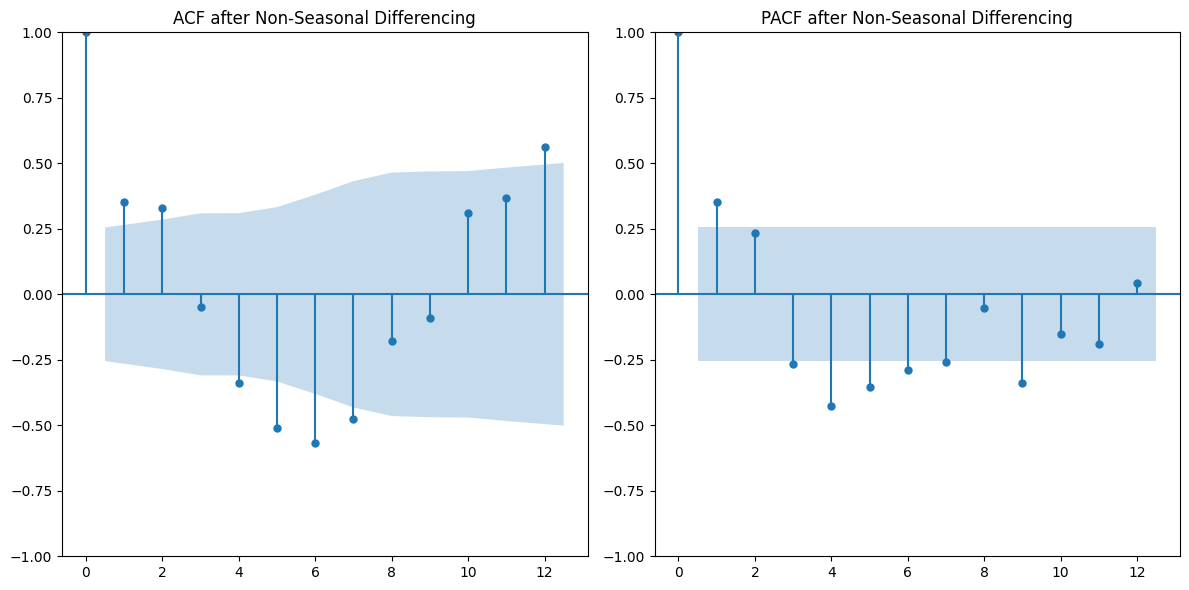

In [3]:
# First difference (non-seasonal differencing)
diff_data = data.diff().dropna()

# Plot ACF and PACF after differencing
plt.figure(figsize=(12, 6))

# Plot ACF and PACF for non-seasonal differencing
plt.subplot(1, 2, 1)
plot_acf(diff_data, lags=seasonal_period, ax=plt.gca())
plt.title('ACF after Non-Seasonal Differencing')

plt.subplot(1, 2, 2)
plot_pacf(diff_data, lags=seasonal_period, ax=plt.gca())
plt.title('PACF after Non-Seasonal Differencing')

plt.tight_layout()
plt.show()

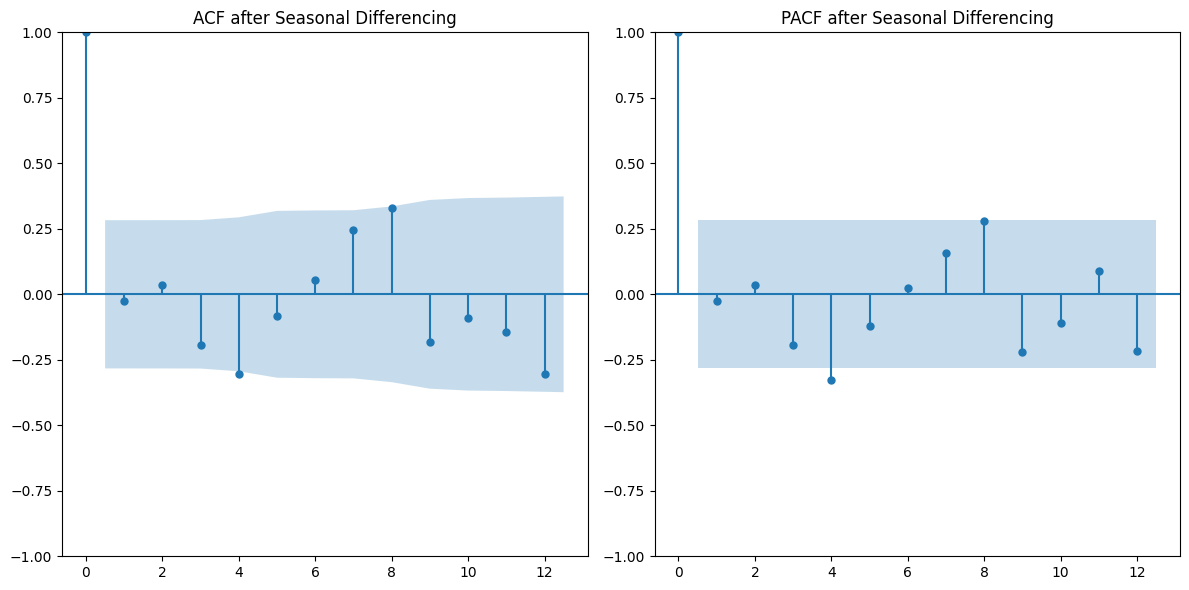

In [4]:
# Seasonal differencing (if needed)
seasonal_diff_data = data.diff(seasonal_period).dropna()

# Plot ACF and PACF for seasonal differencing
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(seasonal_diff_data, lags=seasonal_period, ax=plt.gca())
plt.title('ACF after Seasonal Differencing')

plt.subplot(1, 2, 2)
plot_pacf(seasonal_diff_data, lags=seasonal_period, ax=plt.gca())
plt.title('PACF after Seasonal Differencing')

plt.tight_layout()
plt.show()

## Putting It All Together: SARIMA $ (p, d, q) \times (P, D, Q, s) $

- **Non-seasonal** part $ (p, d, q) $ captures short-term patterns and non-seasonal trends.
- **Seasonal** part $ (P, D, Q, s) $ captures repeating seasonal patterns.

## Example: SARIMA(1,1,1)(1,1,2,12)

For this model:
- Non-seasonal parameters $ (p, d, q) = (1, 1, 1) $: 
  - **$ p=1 $**: Considers one previous observation.
  - **$ d=1 $**: First-order differencing to remove trends.
  - **$ q=1 $**: Includes one lagged forecast error in the model.
  
- Seasonal parameters $ (P, D, Q, s) = (1, 1, 2, 12) $:
  - **$ P=1 $**: Considers one seasonally lagged observation (12 steps back if monthly data).
  - **$ D=1 $**: Seasonal differencing (subtracts values from 12 months ago to remove seasonality).
  - **$ Q=2 $**: Includes two seasonal moving average terms (lagged forecast errors from 12 and 24 months ago).
  - **$ s=12 $**: Specifies a seasonality period of 12 months.

This SARIMA model structure captures both short-term and seasonal patterns, making it effective for time series with clear seasonality (e.g., monthly data with annual cycles).